# Preprocessing

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('GlobalTemperatures.csv', parse_dates=['dt'])

### Wypełnienie brakujących danych średnią wartością

In [3]:
filledData = data.apply(lambda x: x.fillna(x.mean()), axis = 0)

In [4]:
filledData.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
1,1750-02-01,3.083,3.702,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
2,1750-03-01,5.626,3.076,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
3,1750-04-01,8.490,2.451,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
4,1750-05-01,11.573,2.072,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532


#### Sprawdzenie efektów wypełnienia brakujących danych

- wypłenienie brakujących danych przebiegło efektywnie 
- nastąpiły zmiany w wartościach opisu statystycznego danych
- nastąpiły zmiany w histogramach

In [5]:
filledData.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.373064,1.094376,3.404137,0.460672,3.282695,0.352167,1.006406,0.058126
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.327750,0.187000,12.266000,0.206750,0.959500,0.231000,14.765500,0.108000
50%,8.584500,0.394500,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
75%,12.538750,1.413250,16.749000,0.479782,4.669000,0.431849,15.819500,0.131000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [6]:
filledData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null datetime64[ns]
LandAverageTemperature                       3192 non-null float64
LandAverageTemperatureUncertainty            3192 non-null float64
LandMaxTemperature                           3192 non-null float64
LandMaxTemperatureUncertainty                3192 non-null float64
LandMinTemperature                           3192 non-null float64
LandMinTemperatureUncertainty                3192 non-null float64
LandAndOceanAverageTemperature               3192 non-null float64
LandAndOceanAverageTemperatureUncertainty    3192 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 224.6 KB


In [7]:
filledData.isna().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [8]:
filledData.hist(figsize = (25, 25), alpha = 0.8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b5e3f10>,
      dtype=object)

In [23]:
# pip install ipynb
from ipynb.fs.full.analysis import makeThreePlot

In [ ]:
filledTempByYear = filledData.groupby(data.dt.dt.year).mean()

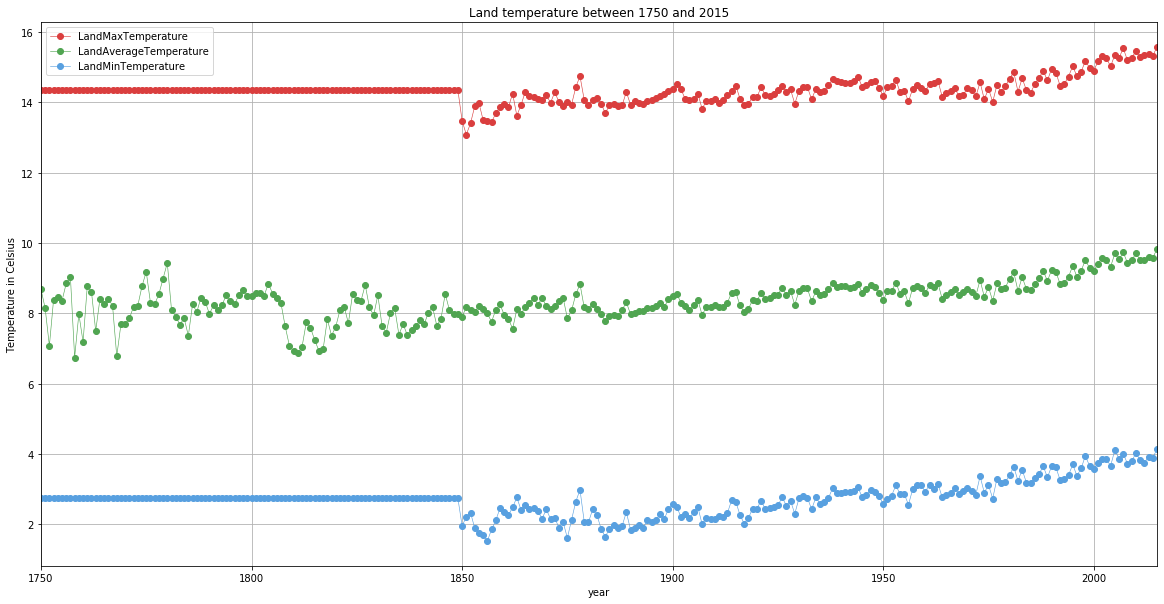

In [24]:
makeThreePlot(filledTempByYear, 'Land temperature between 1750 and 2015', 'year')

In [11]:
filledTempByMonth = filledData.groupby(data.dt.dt.month).mean()

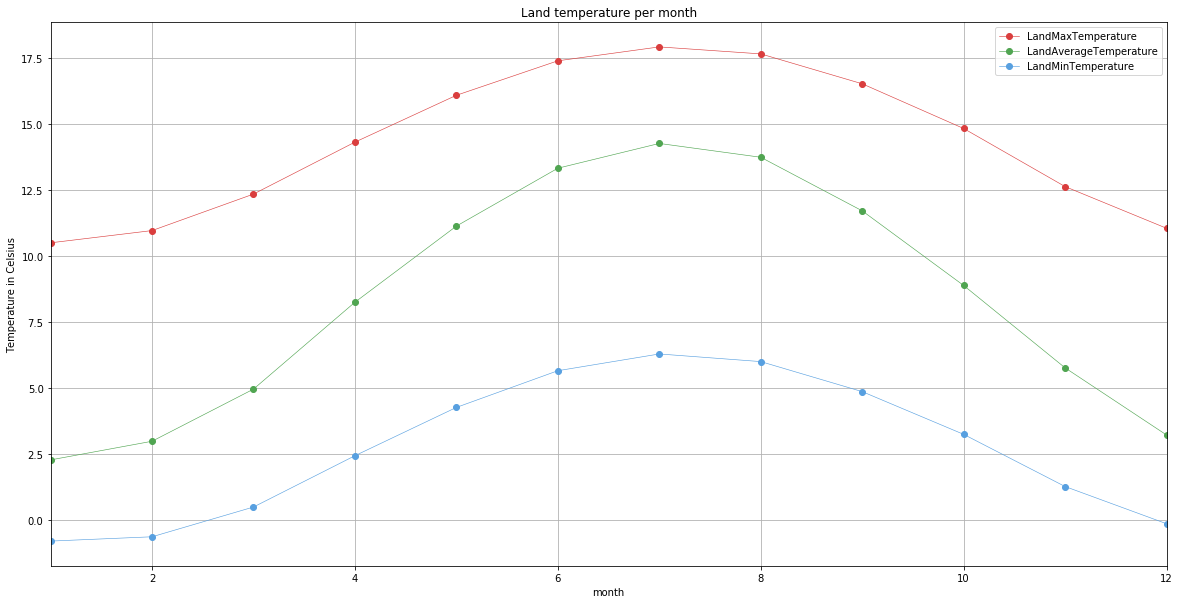

In [25]:
makeThreePlot(filledTempByMonth, 'Land temperature per month', 'month')